In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import anndata as an
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import scanorama
import math
import squidpy as sq
#import anndata as ad
#import gseapy

#import SpaGCN as spg
#from scipy.sparse import issparse
#import random, torch
#import warnings
#warnings.filterwarnings("ignore")
import matplotlib.colors as clr
import matplotlib.pyplot as plt
#import cv2
from matplotlib import pyplot as plt

import sys, getopt
import copy
from PIL import Image, ImageOps


In [13]:
print(sc.__version__)
print(sq.__version__)

1.9.1
1.2.2


In [2]:
sc.settings.set_figure_params(dpi=120)

In [8]:
FGR_1 = sq.read.visium(path = '../January_2024/MS1/outs', 
                      # count_file='filtered_feature_bc_matrix.h5', 
                       library_id='FGR_1', 
                       #source_image_path='../January_2024/MS1/outs/spatial',
                       load_images=True)

FGR_2 = sq.read.visium(path = '../January_2024/MS3/outs', 
                       #count_file='filtered_feature_bc_matrix.h5', 
                       library_id='FGR_2', 
                      # source_image_path='../January_2024/MS3/outs/spatial',
                       load_images=True)

Control_1 = sq.read.visium(path = '../January_2024/CB1/outs', 
                       #count_file='filtered_feature_bc_matrix.h5', 
                       library_id='Control_1', 
                       #source_image_path='../January_2024/CB1/outs/spatial',
                       load_images=True)

Control_2 = sq.read.visium(path = '../July_2023/MS3/outs', 
                      # count_file='filtered_feature_bc_matrix.h5', 
                       library_id='Control_2',
                       #source_image_path='../July_2023/MS3/spatial',
                       load_images=True)


/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
# need to run this step or you won't be able to use the images in the analysis
FGR_1.obsm['spatial'] = FGR_1.obsm['spatial'].astype(np.int64)
FGR_2.obsm['spatial'] = FGR_2.obsm['spatial'].astype(np.int64)
Control_1.obsm['spatial'] = Control_1.obsm['spatial'].astype(np.int64)
Control_2.obsm['spatial'] = Control_2.obsm['spatial'].astype(np.int64)

In [10]:
list(FGR_1.uns['spatial'])[0]

'FGR_1'

In [11]:
# add some metadata
FGR_1.obs['Trimester']="Third"
FGR_1.obs['Sample']=list(FGR_1.uns['spatial'])[0]
FGR_1.obs['Pathology']="FGR"
FGR_1.obs['Sex']="Female"
FGR_1.obs['Gestation']="263"
FGR_1.obs['Centile']="0.6"
FGR_1.obs['Delivery']="C/S"
FGR_1.obs['BMI']="24"
FGR_1.obs['Mat_age']="31"
FGR_1.obs['Code']="TNB315"
FGR_1.obs['Batch']="January_2024"
FGR_1.obs['Batch2']="January_2024"
FGR_1.obsm['spatial'][:,1] = -FGR_1.obsm['spatial'][:,1]

FGR_2.obs['Trimester']="Third"
FGR_2.obs['Sample']=list(FGR_2.uns['spatial'])[0]
FGR_2.obs['Pathology']="FGR"
FGR_2.obs['Sex']="Male"
FGR_2.obs['Gestation']="273"
FGR_2.obs['Centile']="3.1"
FGR_2.obs['Delivery']="NVD"
FGR_2.obs['BMI']="23"
FGR_2.obs['Mat_age']="25"
FGR_2.obs['Code']="TNB297"
FGR_2.obs['Batch']="January_2024"
FGR_2.obs['Batch2']="January_2024"
FGR_2.obsm['spatial'][:,1] = -FGR_2.obsm['spatial'][:,1]

#FGR_3.obs['Trimester']="Third"
#FGR_3.obs['Sample']=list(FGR_3.uns['spatial'])[0]
#FGR_3.obs['Pathology']="FGR"
#FGR_3.obs['Sex']="Male"
#FGR_3.obs['Gestation']="262"
#FGR_3.obs['Centile']="3"
#FGR_3.obs['Delivery']="C/S"
#FGR_3.obs['BMI']="28"
#FGR_3.obs['Mat_age']="36"
#FGR_3.obs['Code']="TNB66"
#FGR_3.obsm['spatial'][:,1] = -FGR_3.obsm['spatial'][:,1]

Control_1.obs['Trimester']="Third"
Control_1.obs['Sample']=list(Control_1.uns['spatial'])[0]
Control_1.obs['Pathology']="Control"
Control_1.obs['Pathology2']="Control"
Control_1.obs['Sex']="Male"
Control_1.obs['Gestation']="262"
Control_1.obs['Centile']="78"
Control_1.obs['Delivery']="C/S"
Control_1.obs['BMI']="20"
Control_1.obs['Mat_age']="26"
Control_1.obs['Code']="TOM3592"
Control_1.obs['Batch']="January_2024"
Control_1.obs['Batch2']="January_2024"
Control_1.obsm['spatial'][:,1] = -Control_1.obsm['spatial'][:,1]

Control_2.obs['Trimester']="Third"
Control_2.obs['Sample']=list(Control_2.uns['spatial'])[0]
Control_2.obs['Pathology']="Control"
Control_2.obs['Sex']="Female"
Control_2.obs['Gestation']="277"
Control_2.obs['Centile']="99"
Control_2.obs['Delivery']="C/S"
Control_2.obs['BMI']="25"
Control_2.obs['Mat_age']="21"
Control_2.obs['Code']="TOM4066"
Control_2.obs['Batch']="July_2023"
Control_2.obs['Batch2']="July_2023"
Control_2.obsm['spatial'][:,1] = -Control_2.obsm['spatial'][:,1]


In [12]:
FGR_1.var_names_make_unique
FGR_2.var_names_make_unique
Control_1.var_names_make_unique
Control_2.var_names_make_unique

FGR_1.obs_names_make_unique
FGR_2.obs_names_make_unique
Control_1.obs_names_make_unique
Control_2.obs_names_make_unique

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 4868 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'Trimester', 'Sample', 'Pathology', 'Sex', 'Gestation', 'Centile', 'Delivery', 'BMI', 'Mat_age', 'Code', 'Batch', 'Batch2'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'>

In [13]:
if isinstance(FGR_1.obsm['spatial'], str):
    print("FGR_1.obsm['spatial'] is a string")
else:
        print("FGR_1.obsm['spatial'] is not a string")

FGR_1.obsm['spatial'] is not a string


In [14]:
adatals = [FGR_1,FGR_2,Control_1,Control_2]

In [15]:
sampleIDs = pd.DataFrame([list(FGR_1.uns['spatial'])[0],
                         list(FGR_2.uns['spatial'])[0],
                         list(Control_1.uns['spatial'])[0],
                         list(Control_2.uns['spatial'])[0]])
                         

In [16]:
FGR_2.obs

,in_tissue,array_row,array_col,Trimester,Sample,Pathology,Sex,Gestation,Centile,Delivery,BMI,Mat_age,Code,Batch,Batch2
AAACAAGTATCTCCCA-1,1,50,102,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
AAACACCAATAACTGC-1,1,59,19,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
AAACAGAGCGACTCCT-1,1,14,94,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
AAACAGGGTCTATATT-1,1,47,13,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
AAACAGTGTTCCTGGG-1,1,73,43,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
TTGTTTCACATCCAGG-1,1,58,42,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
TTGTTTCATTAGTCTA-1,1,60,30,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024
TTGTTTGTATTACACG-1,1,73,41,Third,FGR_2,FGR,Male,273,3.1,NVD,23,25,TNB297,January_2024,January_2024


In [17]:
sampleIDs[0].astype("category")

0        FGR_1
1        FGR_2
2    Control_1
3    Control_2
Name: 0, dtype: category
Categories (4, object): ['Control_1', 'Control_2', 'FGR_1', 'FGR_2']

In [18]:
for adatal in adatals:
    adatal.obs_names_make_unique()
    adatal.var_names_make_unique()


In [19]:
FGR_1.var_names_make_unique
FGR_2.var_names_make_unique
Control_1.var_names_make_unique
Control_2.var_names_make_unique

FGR_1.obs_names_make_unique
FGR_2.obs_names_make_unique
Control_1.obs_names_make_unique
Control_2.obs_names_make_unique

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 4868 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'Trimester', 'Sample', 'Pathology', 'Sex', 'Gestation', 'Centile', 'Delivery', 'BMI', 'Mat_age', 'Code', 'Batch', 'Batch2'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'>

In [20]:
# merge into one object.

#adata_merge = sc.concat(*adatals, join='outer')
adata_merge = sc.AnnData.concatenate(*adatals, batch_key='Batch', join='outer')
#adata_merge = anndata.concat(*adatals, join='outer', index_unique='-')


/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [21]:
adata_merge

AnnData object with n_obs × n_vars = 17614 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'Trimester', 'Sample', 'Pathology', 'Sex', 'Gestation', 'Centile', 'Delivery', 'BMI', 'Mat_age', 'Code', 'Batch', 'Batch2', 'Pathology2'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [22]:
adata_merge.obs.head()

,in_tissue,array_row,array_col,Trimester,Sample,Pathology,Sex,Gestation,Centile,Delivery,BMI,Mat_age,Code,Batch,Batch2,Pathology2
AAACAAGTATCTCCCA-1-0,1,50,102,Third,FGR_1,FGR,Female,263,0.6,C/S,24,31,TNB315,0,January_2024,NaN
AAACAATCTACTAGCA-1-0,1,3,43,Third,FGR_1,FGR,Female,263,0.6,C/S,24,31,TNB315,0,January_2024,NaN
AAACACCAATAACTGC-1-0,1,59,19,Third,FGR_1,FGR,Female,263,0.6,C/S,24,31,TNB315,0,January_2024,NaN
AAACAGAGCGACTCCT-1-0,1,14,94,Third,FGR_1,FGR,Female,263,0.6,C/S,24,31,TNB315,0,January_2024,NaN
AAACAGCTTTCAGAAG-1-0,1,43,9,Third,FGR_1,FGR,Female,263,0.6,C/S,24,31,TNB315,0,January_2024,NaN


In [23]:
list(adatals[0].uns["spatial"])[0]

'FGR_1'

In [24]:
for i in list(range(len(adatals))):
    print(i)
    # add back the spatial coordinates as separate embeddings
    adata_merge.obsm['X_spatial_'+list(adatals[i].uns["spatial"])[0]] = np.zeros(adata_merge.obsm['spatial'].shape)
    adata_merge.obsm['X_spatial_'+list(adatals[i].uns["spatial"])[0]][np.where(adata_merge.obs['Sample']==list(adatals[i].uns["spatial"])[0])] = adatals[i].obsm['spatial']

adata_merge.uns['spatial'] = dict()
for i in list(range(len(adatals))):
    adata_merge.uns['spatial']["spatial_"+list(adatals[i].uns["spatial"])[0]] = adatals[i].uns['spatial'][list(adatals[i].uns["spatial"])[0]]

0
1
2
3


In [24]:
adata_merge.var_names.str.startswith("MT-").sum()

0

In [25]:
print(adata_merge.obs['Sample'].value_counts())


Control_2    4868
FGR_1        4495
Control_1    4253
FGR_2        3998
Name: Sample, dtype: int64


In [26]:
sc.pp.calculate_qc_metrics(adata_merge, percent_top=None, log1p=True, inplace=True)

In [25]:
mito_genes = adata_merge.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
#adata_merged.obs['percent_mt2'] = np.sum(
#    adata_merged[:, mito_genes].X, axis=1).A1 / np.sum(adata_merged.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
#adata_merged.obs['n_counts'] = adata_merged.X.sum(axis=1).A1

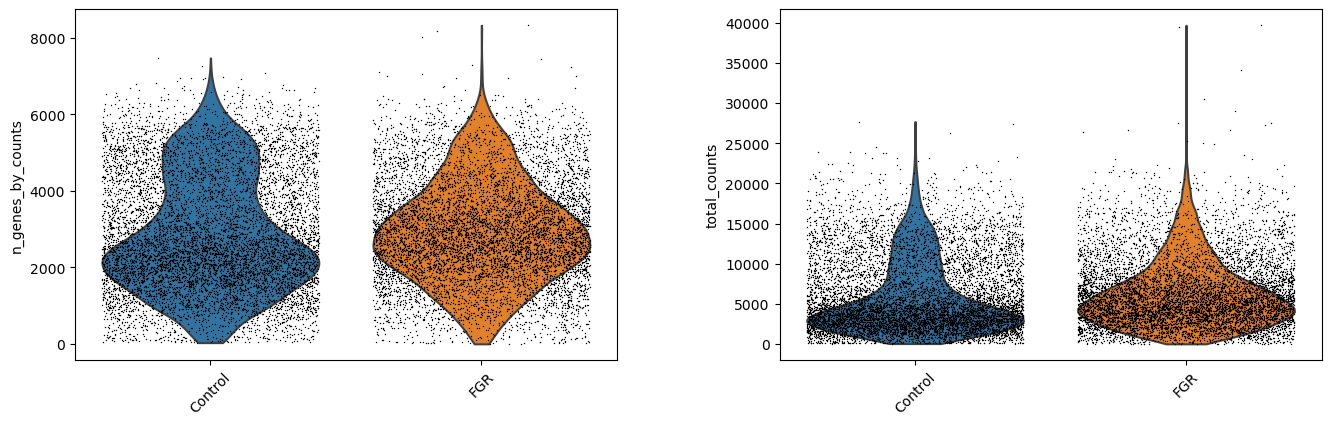

In [28]:
sc.pl.violin(adata_merge, ['n_genes_by_counts', 'total_counts'],# 'pct_counts_mt'],
             jitter=0.4, groupby = 'Pathology', rotation= 45)#, save= 'plots.png')

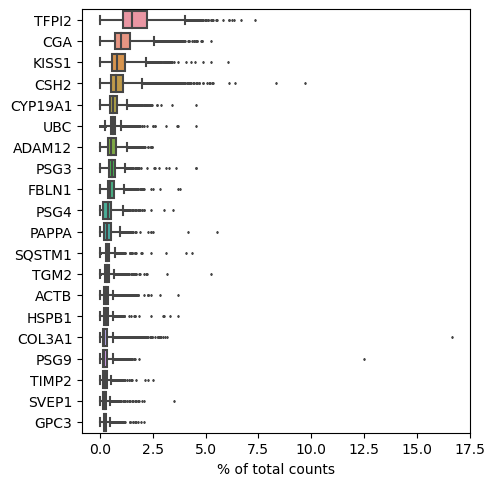

In [29]:
sc.pl.highest_expr_genes(adata_merge, n_top=20)

In [30]:
sc.pp.filter_cells(adata_merge, min_genes=100)
sc.pp.filter_genes(adata_merge, min_cells=3)

In [31]:
# normalization, log1p transformation and select HVGs
sc.pp.normalize_total(adata_merge, inplace=True)
sc.pp.log1p(adata_merge)
sc.pp.highly_variable_genes(adata_merge, flavor="seurat", n_top_genes=2000, subset=False)

In [32]:
# PCA, UMAP and clustering by leiden
sc.pp.pca(adata_merge)
sc.pp.neighbors(adata_merge)
sc.tl.umap(adata_merge)
sc.tl.leiden(adata_merge, key_added="clusters")

/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
#adata_merge.obs['Sample_Type'] = pd.concat([adata_merge.obs['Sample'], adata_merge.obs['Trimester']], axis=1).apply(lambda x:'_'.join(x), axis=1)

In [34]:
adata_merge.obs['Batch']

AAACAAGTATCTCCCA-1-0    0
AAACAATCTACTAGCA-1-0    0
AAACACCAATAACTGC-1-0    0
AAACAGAGCGACTCCT-1-0    0
AAACAGCTTTCAGAAG-1-0    0
                       ..
TTGTTTCACATCCAGG-1-3    3
TTGTTTCATTAGTCTA-1-3    3
TTGTTTCCATACAACT-1-3    3
TTGTTTGTATTACACG-1-3    3
TTGTTTGTGTAAATTC-1-3    3
Name: Batch, Length: 17539, dtype: category
Categories (4, object): ['0', '1', '2', '3']

In [167]:
#adata_merge.raw = adata_merge

/opt/miniconda3/envs/velocity_visium_analysis_py310/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


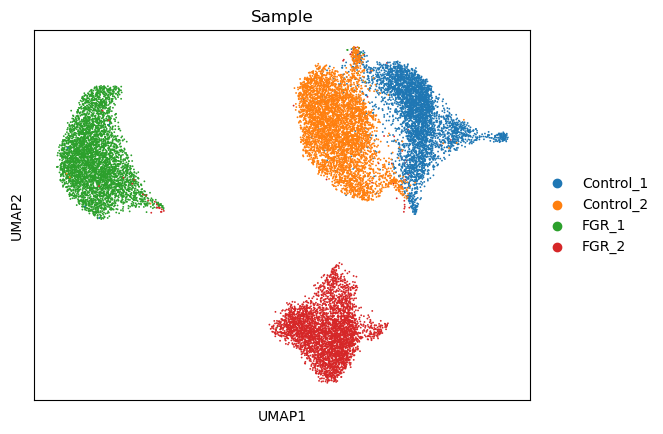

In [35]:
sc.pl.umap(adata_merge, color=['Sample'])

In [25]:
# collect sample names
sampleNames = list()
for f in list(adata_merge.obsm):
    if "spatial_" in f: # search for the pattern
        library_id=f.replace("X_spatial_","") # parse the string and get the sample id
        #library_id=library_id.replace("V1_","")
        sampleNames.append(library_id)
sampleNames

['FGR_1', 'FGR_2', 'Control_1', 'Control_2']

In [26]:
samples = sampleIDs

In [27]:
from PIL import Image
spatial=adata_merge.uns["spatial"]
dim=''
import math
if dim=='':
    height = math.ceil(math.sqrt(len(samples)))
    width = math.ceil(len(samples)/height)
else:
    width,height = dim.split('x')


In [28]:
print(height)
print(width)
print(len(sampleNames))

2
2
4


In [29]:
idx = 0
size=700
#creates a new empty image, RGB mode, and size 1400 by 1400.
new_im = Image.new('RGB', (size*width,size*height))
for i in range(0,size*width,size):
    for j in range(0,size*height,size):
        # load the image from the object
        #im = Image.fromarray((spatial["spatial_V1_"+samples[idx]]["images"]["lowres"]* 255).round().astype(np.uint8)) # found a solution to covert float32 to unit8
        im = Image.fromarray((spatial["spatial_"+sampleNames[idx]]["images"]["lowres"]* 255).round().astype(np.uint8)) # found a solution to covert float32 to unit8
        # paste images together
        new_im.paste(im, (j,i))
        print(idx)
        idx = idx+1
        if idx>=len(sampleNames):
            break


0
1
2
3


In [30]:
# fake a adata.uns by providing merged lowres image and scale factors 1
adata_merge.uns['spatial']['spatial_Merged'] = copy.deepcopy(adata_merge.uns['spatial'][list(adata_merge.uns['spatial'])[0]])
adata_merge.uns['spatial']['spatial_Merged']['images']["hires"] = np.asarray(new_im)
adata_merge.uns['spatial']['spatial_Merged']['images']["lowres"] = np.asarray(new_im)
adata_merge.uns['spatial']['spatial_Merged']['scalefactors']['tissue_lowres_scalef'] = 1
adata_merge.uns['spatial']['spatial_Merged']['scalefactors']['tissue_hires_scalef'] = 1

In [31]:
# add back the spatial coordinates as separate embeddings
idx = 0
adata_merge.obsm['X_spatial_Merged'] = adata_merge.obsm['spatial']
for i in range(0,size*width,size):
    for j in range(0,size*height,size):
        #library_id='spatial_V1_'+samples[idx] # parse the string and get the sample id
        library_id='spatial_'+sampleNames[idx] # parse the string and get the sample id
        print(library_id)
        tissue_lowres_scalef = spatial[library_id]['scalefactors']['tissue_lowres_scalef']
        adata_merge.obsm['X_spatial_Merged'][np.where(adata_merge.obs['Sample']==sampleNames[idx])] = copy.deepcopy(adatals[idx].obsm['spatial'])
        adata_merge.obsm['X_spatial_Merged'][np.where(adata_merge.obs['Sample']==sampleNames[idx]),1] = adatals[idx].obsm['spatial'][:,1]*tissue_lowres_scalef - i
        adata_merge.obsm['X_spatial_Merged'][np.where(adata_merge.obs['Sample']==sampleNames[idx]),0] = adatals[idx].obsm['spatial'][:,0]*tissue_lowres_scalef + j
        idx = idx+1
        if idx>=len(sampleNames):
            break


spatial_FGR_1
spatial_FGR_2
spatial_Control_1
spatial_Control_2


In [32]:
adata_merge.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
TSPY1,ENSG00000258992,Gene Expression,GRCh38
USP9Y,ENSG00000114374,Gene Expression,GRCh38
DDX3Y,ENSG00000067048,Gene Expression,GRCh38
TMSB4Y,ENSG00000154620,Gene Expression,GRCh38


In [33]:
outputfile = 'FGR_Control_merged_March_2025.h5ad'
adata_merge.write_h5ad(outputfile)